In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
from wordcloud import WordCloud
from matplotlib.pyplot import imread
%matplotlib inline

In [7]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Elon Musk

In [8]:
mail=pd.read_csv("Elon_musk.csv",encoding='latin-1')
mail

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [9]:
mail.drop(['Unnamed: 0'],inplace=True,axis=1)
mail

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [10]:
mail=[Text.strip() for Text in mail.Text]
mail=[Text for Text in mail if Text]

In [11]:
#Joining the list into one string/text
text=' '.join(mail)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [12]:
# to remove Twitter Username & tokenise it.
from nltk.tokenize import TweetTokenizer
tknr = TweetTokenizer(strip_handles=True)
tokens=tknr.tokenize(text)
print(tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [13]:
# Again Joining the list into one string/text
text1=' '.join(tokens)
text1

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [14]:
# Remove Punctuation Mark
punc = text1.translate(str.maketrans('', '', string.punctuation))
punc

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [15]:
# Word Tokenization
from nltk.tokenize import word_tokenize

In [16]:
word_tk= word_tokenize(punc)
print(word_tk)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'httpstco3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'se

In [17]:
len(word_tk)

18502

In [18]:
token_text=' '.join(word_tk)
token_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge All thought he would fail Himself most of all httpstcozGxJFDzzrM Haha thanks Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together o

In [19]:
# remove url or http
import re
url=re.sub(r'http\S+', '', punc)
url

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [20]:
url_token=word_tokenize(url)
print(url_token)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Remove Stopwords
stop_word=stopwords.words('english')
stop_word2= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
stop_word.extend(stop_word2)
no_stop_word=[word for word in url_token if not word in stop_word]
print(no_stop_word)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

In [23]:
# Normalize the data
norm=[Text.lower() for Text in no_stop_word]
print(norm)

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flo

In [24]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
df=nlp(' '.join(norm))
print(df)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In [25]:
lemma=[token.lemma_ for token in df]
print(lemma)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'star

In [26]:
clean=' '.join(lemma)
clean

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team manage 100 m 

In [27]:
# Feature Extraction

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X = vect.fit_transform(lemma)

In [29]:
print(vect.vocabulary_)

{'alien': 195, 'ray': 2359, 'trace': 3023, 'cyberpunk': 769, 'hdr': 1364, 'nextlevel': 1969, 'have': 1359, 'try': 3055, 'great': 1312, 'interview': 1561, 'doge': 894, 'underestimate': 3188, 'congratulation': 677, 'tesla': 2931, 'china': 587, 'amazing': 219, 'execution': 1063, 'last': 1645, 'year': 3405, 'now': 1997, 'next': 1968, 'even': 1037, 'happy': 1346, 'new': 1966, 'ox': 2098, 'frodo': 1213, 'underdoge': 3187, 'all': 198, 'think': 2959, 'would': 3391, 'fail': 1098, 'himself': 1406, 'haha': 1335, 'thank': 2941, 'indeed': 1502, 'tweet': 3070, 'definitely': 807, 'represent': 2426, 'realworld': 2374, 'time': 2982, 'allocation': 200, 'the': 2945, 'entertaining': 1007, 'outcome': 2076, 'likely': 1699, 'just': 1603, 'send': 2569, 'agree': 179, 'clubhouse': 616, 'it': 1580, 'get': 1272, 'real': 2369, 'buy': 505, 'dogecoin': 896, 'lil': 1700, 'toddler': 2993, 'hodler': 1412, 'he': 1365, 'issue': 1579, 'sentencing': 2574, 'seem': 2561, 'bit': 420, 'high': 1398, 'fix': 1158, 'please': 2193,

In [30]:
print(vect.get_feature_names())

['000', '005', '10', '100', '1000', '10000', '107', '10x', '11', '12', '122', '13', '130', '14', '140', '149', '15', '150', '155', '16', '162', '17', '18', '1880s', '1b', '1st', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240', '25', '250', '250kw', '25gunsteslacom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445', '448', '4530', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727', '74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
print(X.toarray().shape)

(11486, 3425)


In [33]:
# Count Vectorizer
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemma)

In [34]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'land', 'launch', 'life', 'like', 'look', 'lot', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
# TFIDF Vectorizer


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemma)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'chance', 'change', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'do', 'dock',

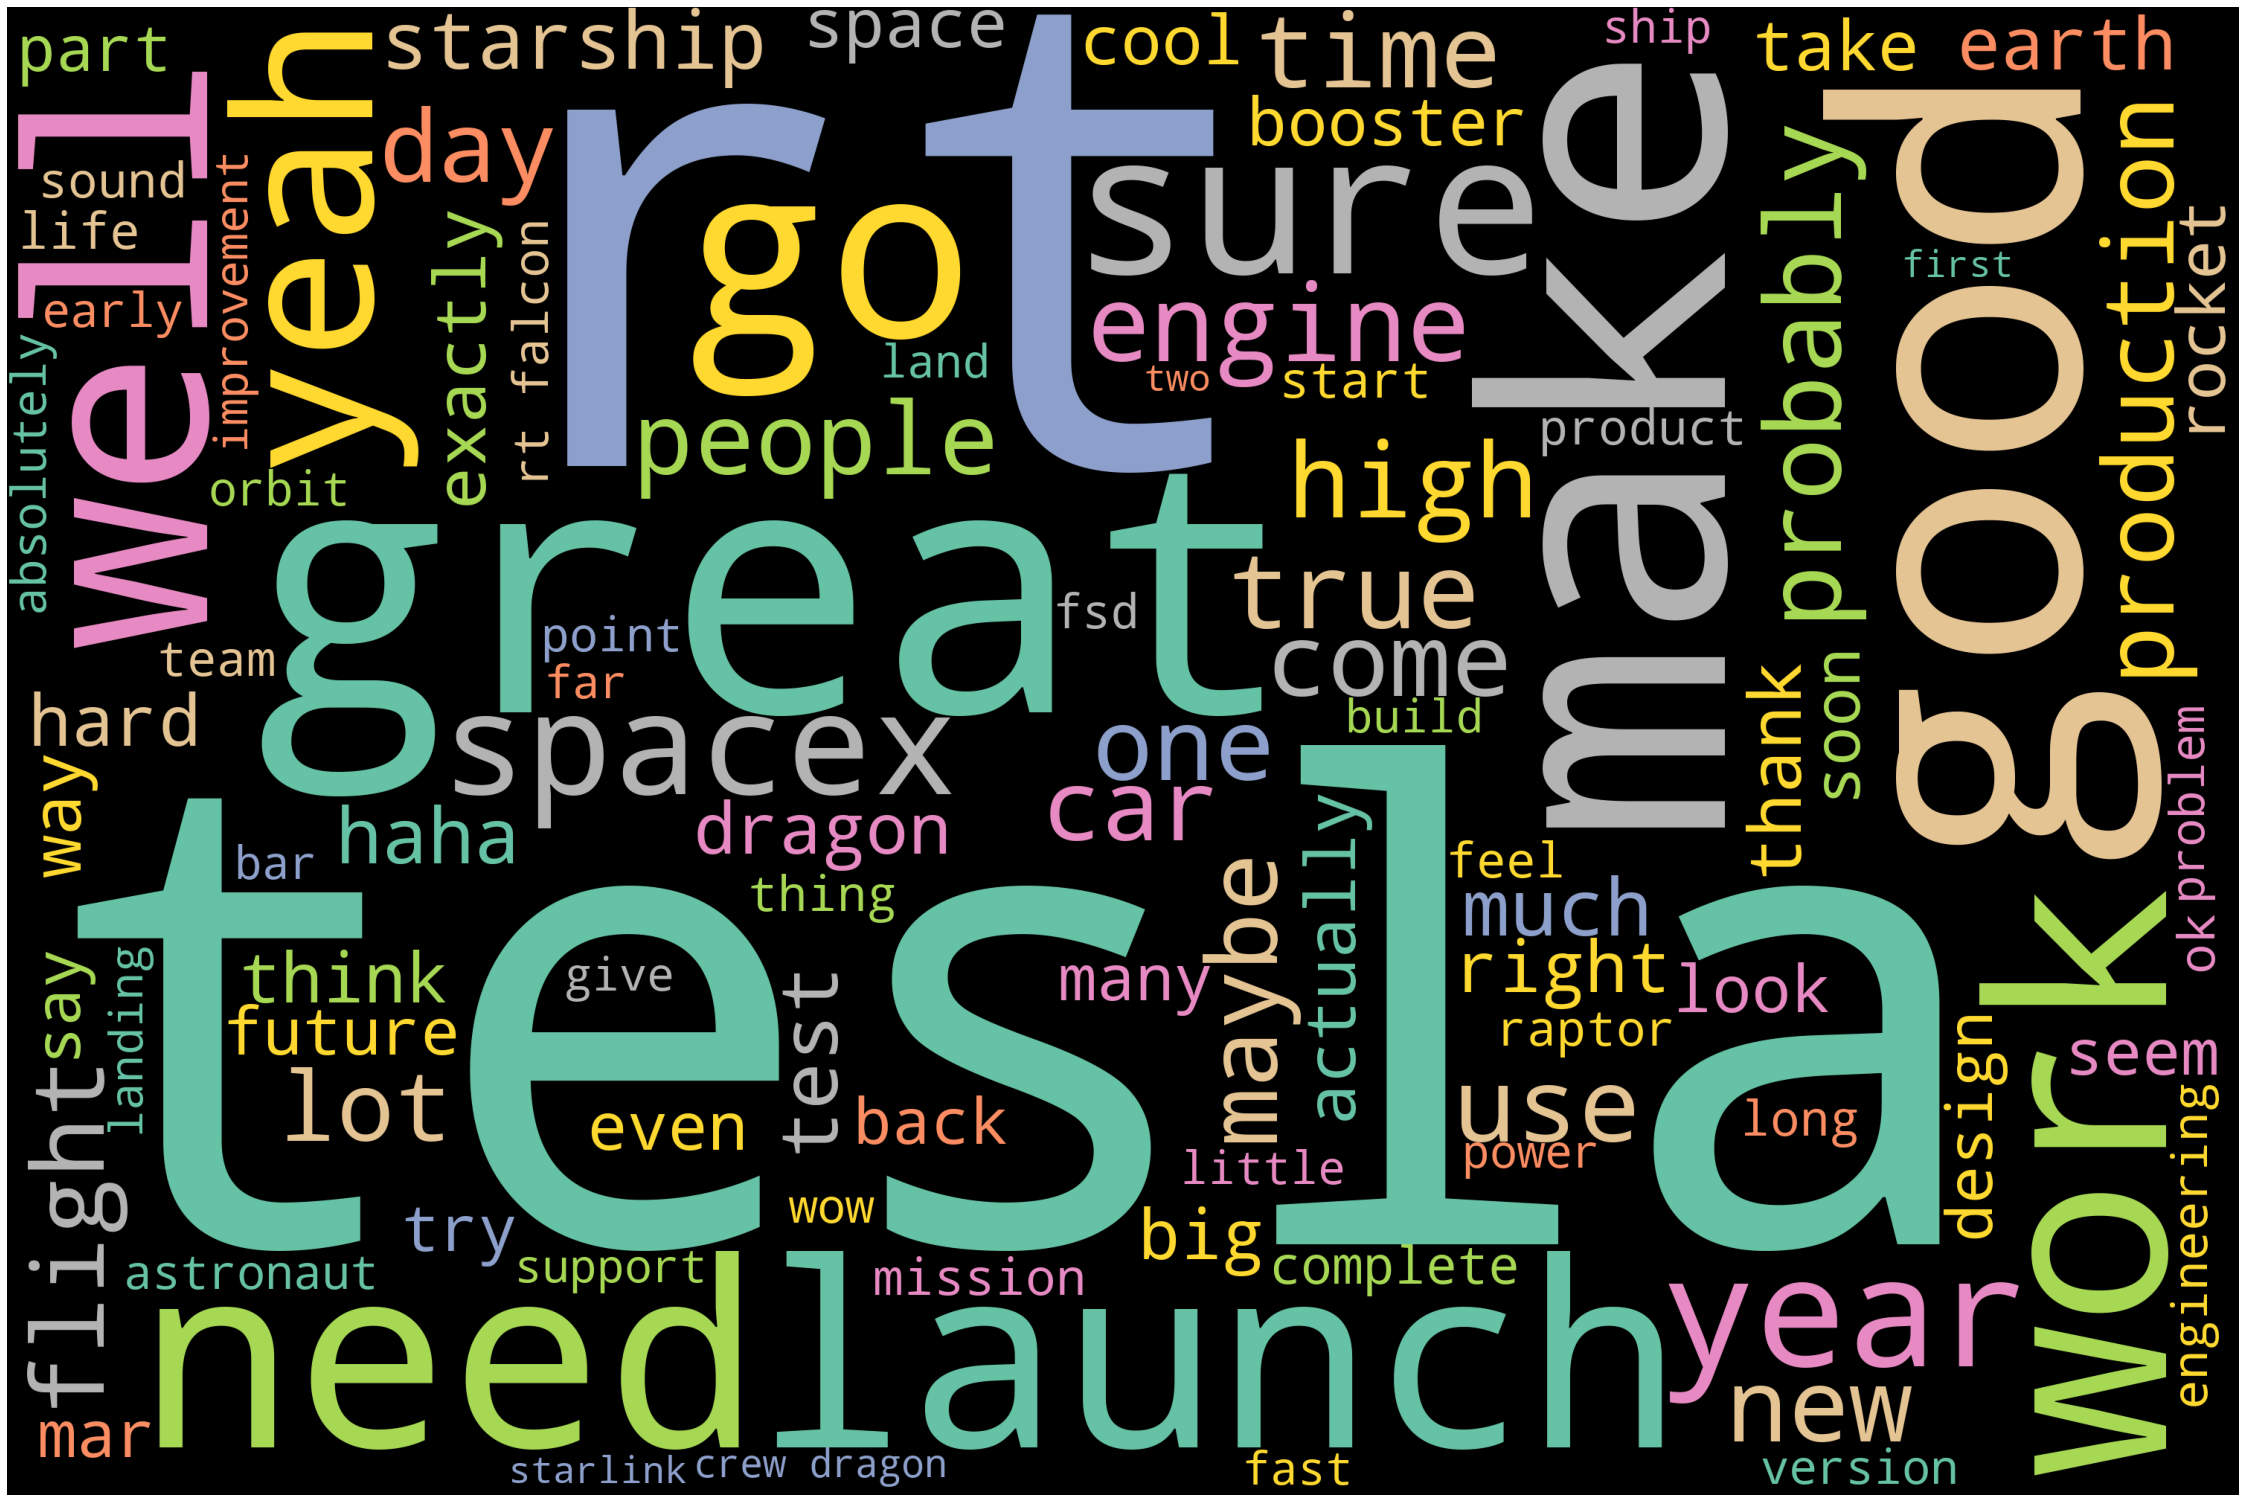

In [37]:
# Generate WordCloud
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean)
plot_cloud(wordcloud)

In [38]:
nlp=spacy.load("en_core_web_sm")
one_block = clean
docs = nlp(one_block)
spacy.displacy.render(docs, style='ent', jupyter=True)

In [39]:
for token in docs:
    print(token, token.pos_)

Streaming output truncated to the last 5000 lines.
generator NOUN
all DET
we PRON
broad ADJ
review NOUN
launch NOUN
site NOUN
propulsion NOUN
structure NOUN
av INTJ
exactly ADV
we PRON
need AUX
make VERB
lot NOUN
improvement NOUN
chance NOUN
complete VERB
48 NUM
launch NOUN
next ADJ
year NOUN
agree VERB
lex PROPN
glad ADJ
ok INTJ
haha INTJ
thank VERB
wait VERB
next ADJ
year NOUN
sure ADV
great ADJ
brown ADJ
average ADJ
latency NOUN
improve NOUN
sit VERB
very ADV
starlink NOUN
design NOUN
probably ADV
5 NUM
6 NUM
optimize NOUN
tanker NOUN
starlink PROPN
revolution PROPN
connectivity NOUN
esp ADJ
yeah INTJ
great ADJ
letter NOUN
it PRON
increasingl VERB
the DET
ship NOUN
ring NOUN
thick ADV
need VERB
it PRON
nextlevel VERB
u0001f4b0 ADJ
u0001f4a9 NOUN
glad ADJ
hear VERB
mom NOUN
ok INTJ
good ADJ
see VERB
inspire VERB
future ADJ
space NOUN
the DET
new ADJ
heat NOUN
pump NOUN
model NOUN
y PROPN
come VERB
soon ADV
great ADJ
render VERB
the DET
circumferentia NOUN
that PRON
hard ADV
have AUX


In [40]:
# Filtering the noun & verbs only
noun_verb = [token.text for token in docs if token.pos_ in ('NOUN', 'VERB')]
print(noun_verb[5:30])

['execution', 'year', 'year', 'ox', 'frodo', 'think', 'fail', 'thank', 'tweet', 'represent', 'time', 'allocation', 'outcome', 'send', 'agree', 'clubhouse', 'get', 'buy', 'dogecoin', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'thank']


In [41]:
# Counting Token
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(noun_verb)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
wf_df

word  count
0         launch     64
1           make     64
2           year     49
3           work     48
4             go     47
...          ...    ...
1925        dire      1
1926    priority      1
1927  propaganda      1
1928       click      1
1929      dumber      1

[1930 rows x 2 columns]

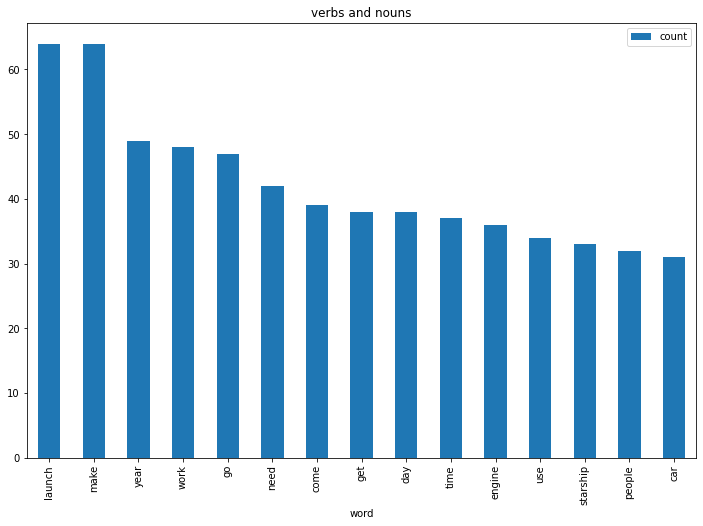

In [42]:
# Visualisation by Bar Chart
wf_df[0:15].plot.bar(x='word', figsize=(12,8), title='verbs and nouns')

In [43]:
# Emotion Minning - Sentiment Analysis

In [44]:
from nltk import tokenize
sent=tokenize.sent_tokenize(' '.join(mail))
sent

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [45]:
sent_df = pd.DataFrame(sent, columns=['sentences'])
sent_df

sentences
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [46]:
afinn = pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [47]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
print(affinity_scores)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [48]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sent=nlp(text)
        for word in sent:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [49]:
# Calculate Sentiment Score for each Sentence
sent_df['sentiment_value']=sent_df['sentences'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [50]:
# words in each Sentence
sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [51]:
sent_df.sort_values(by='sentiment_value')

sentences  sentiment_value  \
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
837  Cool Model 3 review by @iamjamiefoxx https://t...               -6   
680  Occasional flights from land are ok, but frequ...               -4   
886  This is primarily an electrical/electronic (ch...               -4   
..                                                 ...              ...   
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               15   
719  We just havent observed the
 https://t.co/mez...               15   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   

     word_count  
647          60  
64           11  
837          61  
680          39  
886          69  
..          ...  
645          65  
585         138  
36          231  
719          72  
105          94  

[924 rows x 3 columns]

In [52]:
sent_df.sort_values(by='word_count')

sentences  sentiment_value  \
106                                         Hopefully.                2   
522                                          Ovaltine?                0   
194                                           Woohoo!!                0   
394                                     Bandwidth too.                0   
136                                    @sfs_central !!                0   
..                                                 ...              ...   
767  Latter also s
 https://t.co/dlMy5rybrK @NASASp...                3   
216  RT @boringcompany: Tunnel Rave https://t.co/d3...               -3   
643  @tjmurphy_mit @thesheetztweetz @ExploreMars @S...                2   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               15   

     word_count  
106           1  
522           1  
194           1  
394           2  
136           2  
..          ...  
767         129  
216         129  
643         132  
585         138  
36          231  

[924 rows x 3 columns]

In [53]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [54]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentences  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
4             8  
5             6  
6            14  
..          ...  
919          11  
920          31  
921           3  
922          47  
923          15  

[488 rows x 3 columns]

In [55]:
sent_df[sent_df['sentiment_value']>=10]

sentences  sentiment_value  \
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               15   
81   @teslaownersSV This is a good one @MrBeastYT I...               13   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
151  @GUNMTLM3 @lexfridman No, but definitely this ...               11   
159  @harsimranbansal @heydave7 It will most likely...               11   
183  Theres some great AI out ther
 https://t.co/v...               10   
184  Also, w
 https://t.co/IYdKttVsqk @cleantechnic...               12   
224  @PPathole @karpathy For a second there, I thou...               10   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
700  Power
 https://t.co/tSbttIdUHJ @spacecoast_stv...               10   
719  We just havent observed the
 https://t.co/mez...               15   
817  Might be able to
 https://t.co/FB7e5nOq2E @Pri...               11   
855  Impressive Tianwen-1 Mars rover mission launch...               10   

     word_count  
36          231  
81           38  
105          94  
151          45  
159          93  
183          48  
184          98  
224          69  
585         138  
645          65  
700         101  
719          72  
817          72  
855         102

In [56]:
sent_df['index']=range(0,len(sent_df))
sent_df

sentences  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
919          11    919  
920          31    920  
921           3    921  
922          47    922  
923          15    923  

[924 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


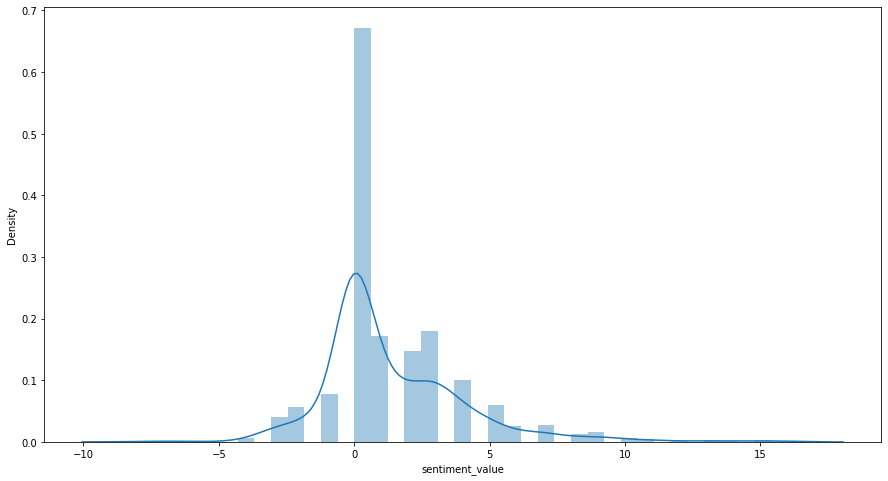

In [57]:
# plotting for whole review
plt.figure(figsize=(15,8))
sns.distplot(sent_df['sentiment_value'])

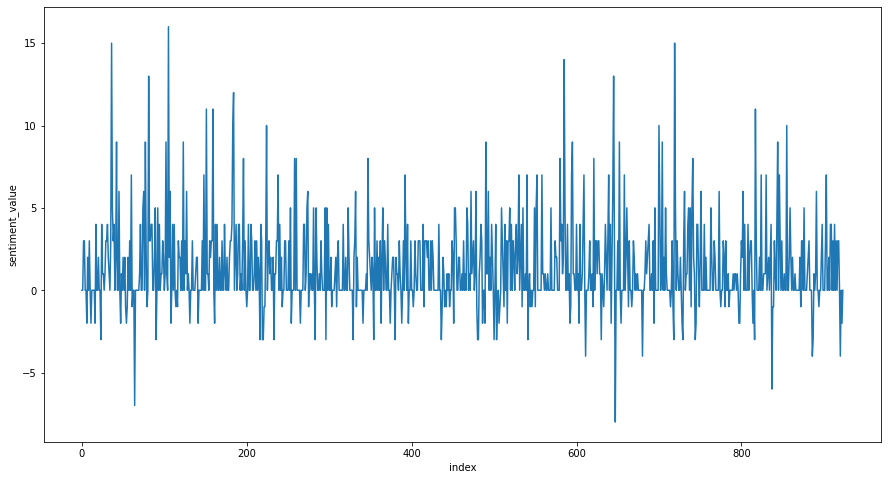

In [58]:
# Line Plot
plt.figure(figsize=(15,8))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

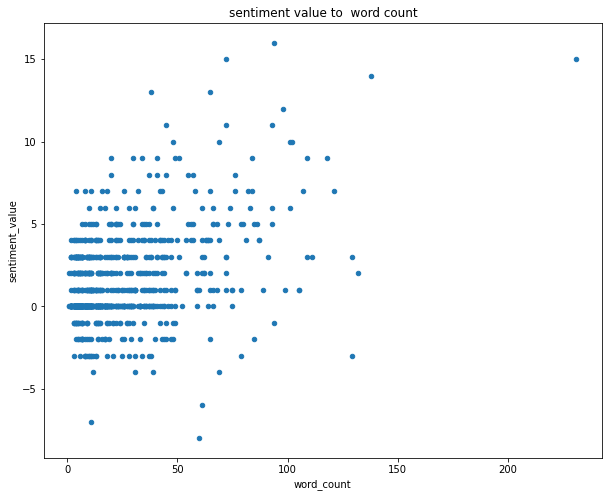

In [59]:
# Scatter Plot
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(10,8),title='sentiment value to  word count')

# Musical Instrument 

In [60]:
data=pd.read_csv('music.csv',encoding='latin-1')
data

X
0      {".": "A2IBPI20UZIR0U", "asin": "1384719342", ...
1      {" ": "A14VAT5EAX3D9S", "asin": "1384719342", ...
2      {".": "A195EZSQDW3E21", "asin": "1384719342", ...
3      {".": "A2C00NNG1ZQQG2", "asin": "1384719342", ...
4      {".": "A94QU4C90B1AX", "asin": "1384719342", "...
...                                                  ...
10109  {".": "A1TJ393OFP21I8", "asin": "B00BU9KCXK", ...
10110  {".": "A34O0KQV4QXWNQ", "asin": "B00BU9KCXK", ...
10111  {".": "A120FZ2ESIMA63", "asin": "B00BU9KCXK", ...
10112  {".": "A1PO2WOQ0LO73Y", "asin": "B00BU9KCXK", ...
10113  {".": "A3KOWHTH4J4ZIK", "asin": "B00BU9KCXK", ...

[10114 rows x 1 columns]

In [61]:
data = [X.strip() for X in data.X] 
data = [X for X in data if X] 
data

['{".": "A2IBPI20UZIR0U", "asin": "1384719342", ".": "cassandra tu \\"Yeah, well, that\'s just like, u...", "helpful": [0, 0], ".": "Not much to write about here, but it does exactly what it\'s supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,", "overall": 5.0, "summary": "good", "..": 1393545600, ".": "02 28, 2014"}',
 '{" ": "A14VAT5EAX3D9S", "asin": "1384719342", "": "Jake", "helpful": [13, 14], ".": "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent\'s sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work j

In [62]:
# Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = data[20]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [63]:
for token in doc_block:
    print(token, token.pos_)

{ PUNCT
" PUNCT
. PUNCT
" PUNCT
: PUNCT
" PUNCT
A1GMWTGXW682 PROPN
GB PROPN
" PUNCT
, PUNCT
" PUNCT
asin NOUN
" PUNCT
: PUNCT
" PUNCT
B000068NSX PROPN
" PUNCT
, PUNCT
" PUNCT
. PUNCT
" PUNCT
: PUNCT
" PUNCT
MetalFan PROPN
" PUNCT
, PUNCT
" PUNCT
helpful ADJ
" PUNCT
: PUNCT
[ X
0 NUM
, PUNCT
0 NUM
] PUNCT
, PUNCT
" PUNCT
. PUNCT
" PUNCT
: PUNCT
" PUNCT
This PRON
is AUX
a DET
cool ADJ
looking VERB
cheap ADJ
cable NOUN
which PRON
works VERB
well ADV
. PUNCT
I PRON
bent VERB
one NUM
of ADP
the DET
connectors NOUN
pretty ADV
badly ADV
but CCONJ
that PRON
was AUX
my PRON
fault NOUN
. PUNCT
One NUM
thing NOUN
to PART
consider VERB
with ADP
the DET
cable NOUN
is AUX
to PART
tighten VERB
the DET
connectors NOUN
once ADV
in ADP
awhile ADV
. PUNCT
You PRON
'll AUX
be AUX
able ADJ
to PART
hear VERB
them PRON
rattle NOUN
. PUNCT
It PRON
seems VERB
that SCONJ
the DET
' PUNCT
retro PROPN
' PART
look NOUN
is AUX
screw NOUN
on ADP
connectors NOUN
over ADP
some DET
black ADJ
rubber NOUN
, PUNCT
but CCON

In [64]:
# Filtering the nouns and verbs 
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[10:30])

['tighten', 'connectors', 'hear', 'rattle', 'seems', 'look', 'screw', 'connectors', 'rubber', 'cable', 'looks', 'works', 'have', 'cable', 'goes', 'guitars', 'bought', 'theses', 'use', 'practicing']


In [65]:
#Counting tokens
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
wf_df

word  count
0        cable      5
1   connectors      3
2      looking      2
3        works      2
4          use      2
5         asin      1
6         bent      1
7        fault      1
8        thing      1
9     consider      1
10     tighten      1
11        hear      1
12      rattle      1
13       seems      1
14        look      1
15       screw      1
16      rubber      1
17       looks      1
18        have      1
19        goes      1
20     guitars      1
21      bought      1
22      theses      1
23  practicing      1
24      others      1
25      cables      1
26        plug      1
27        amps      1
28     cutting      1
29    accident      1
30     summary      1
31      length      1

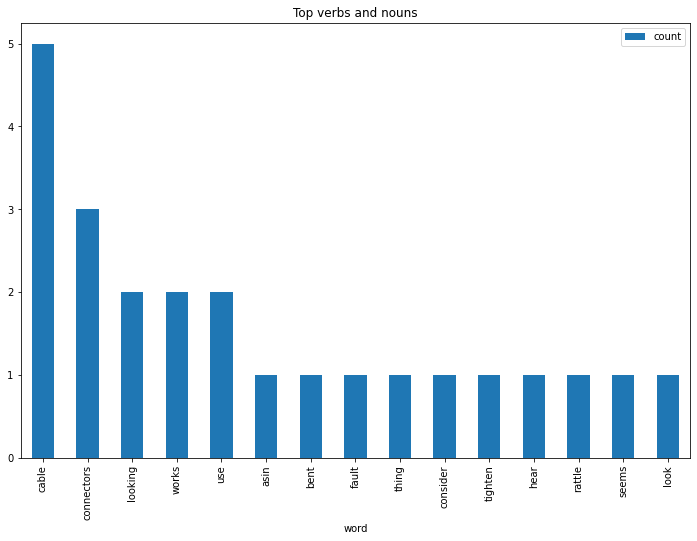

In [66]:
# Barchart for verbs
wf_df[0:15].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns');

In [67]:
# Sentiment analysis
afinn = pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [68]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [69]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [70]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(data))
sentence[5:15]

['now my recordings are much more crisp.',
 'it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,", "overall": 5.0, "summary": "good", "..": 1393545600, ".',
 '": "02 28, 2014"} {" ": "A14VAT5EAX3D9S", "asin": "1384719342", "": "Jake", "helpful": [13, 14], ".',
 '": "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent\'s sake, I cannot stop putting the pop filter next to my nose and smelling it after recording.',
 ':DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product!',
 ':]", "overall": 5.0, "summary": "Jake", "..": 1363392000, ".',
 '": "03 16, 2013"} {".',
 '": "A195EZSQDW

In [71]:
sent_df = pd.DataFrame(sentence, columns=['sentences'])
sent_df

sentences
0                                                    {".
1          ": "A2IBPI20UZIR0U", "asin": "1384719342", ".
2      ": "cassandra tu \"Yeah, well, that's just lik...
3      ": "Not much to write about here, but it does ...
4                            filters out the pop sounds.
...                                                  ...
93769                            ", "..": 1378425600, ".
93770                               ": "09 6, 2013"} {".
93771      ": "A3KOWHTH4J4ZIK", "asin": "B00BU9KCXK", ".
93772                    ": "DJB", "helpful": [0, 0], ".
93773  ": "This guitar stand is as basic as you can g...

[93774 rows x 1 columns]

In [72]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [73]:
sent_df['sentiment_value'] = sent_df['sentences'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        0
1        0
2        4
3        0
4        0
        ..
93769    0
93770    0
93771    0
93772    2
93773    7
Name: sentiment_value, Length: 93774, dtype: int64

In [74]:
sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count']

0         1
1         5
2        13
3        15
4         5
         ..
93769     4
93770     5
93771     5
93772     6
93773    41
Name: word_count, Length: 93774, dtype: int64

In [75]:
sent_df.sort_values(by='sentiment_value')

sentences  sentiment_value  \
8443   I will either squeeze the excess water out, or...              -13   
55279  It was ridiculous .. i mean bad bad ridiculous...              -12   
23844  ": "At the begining I wasn't sure to buy it si...              -12   
39107  ": "I have had this tuner for about half a yea...              -11   
36340  The amp I have now is a totally bad ass Fryett...              -10   
...                                                  ...              ...   
65520  Solid, nice sound, very good quality to make a...               27   
12860  ": "Great great great great great great great ...               27   
47512  ": "what a nice clear sound it has,,and smooth...               27   
70015  ": "These days on my pedal board I have severa...               30   
52970  ": "nice good like fine great fantastic like l...               40   

       word_count  
8443           83  
55279          26  
23844         173  
39107          92  
36340          20  
...           ...  
65520          89  
12860          10  
47512         140  
70015         244  
52970          30  

[93774 rows x 3 columns]

In [76]:
sent_df['sentiment_value'].describe()

count    93774.000000
mean         1.091870
std          2.037065
min        -13.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         40.000000
Name: sentiment_value, dtype: float64

In [77]:
sent_df[sent_df['sentiment_value']<=-1]

sentences  sentiment_value  \
8      ": "The product does exactly as it should and ...               -1   
14     ": "The primary job of this device is to block...               -1   
15     The double cloth filter blocks the pops and le...               -2   
30     ", "overall": 5.0, "summary": "No more pops wh...               -1   
47     Simple fact: cables break, but getting to repl...               -1   
...                                                  ...              ...   
93649  (&#34;You're not getting the right tone, man.....               -2   
93673  ": "My first review was a knee-jerk reaction t...               -4   
93696       Plenty of sound effects to mess around with.               -2   
93717                Why do you have to be so difficult?               -1   
93725  It's not flashy looking, but then it's never s...               -1   

       word_count  
8              74  
14             35  
15             15  
30             12  
47             16  
...           ...  
93649          43  
93673          18  
93696           8  
93717           8  
93725          28  

[6791 rows x 3 columns]

In [78]:
sent_df[sent_df['sentiment_value']>0]

sentences  sentiment_value  \
2      ": "cassandra tu \"Yeah, well, that's just lik...                4   
6      it is one of the lowest prices pop filters on ...                3   
7      ": "02 28, 2014"} {" ": "A14VAT5EAX3D9S", "asi...                2   
9      :DIf you needed a pop filter, this will work j...                2   
13     ": "Rick Bennette \"Rick Bennette\"", "helpful...                2   
...                                                  ...              ...   
93764              ": "dgray5150", "helpful": [0, 0], ".                2   
93765  ": "This stand is sturdy and my guitars &#34;s...                2   
93768  ", "overall": 5.0, "summary": "I will be buyin...                3   
93772                    ": "DJB", "helpful": [0, 0], ".                2   
93773  ": "This guitar stand is as basic as you can g...                7   

       word_count  
2              13  
6              32  
7              15  
9              30  
13              9  
...           ...  
93764           6  
93765          12  
93768          14  
93772           6  
93773          41  

[40302 rows x 3 columns]

In [79]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


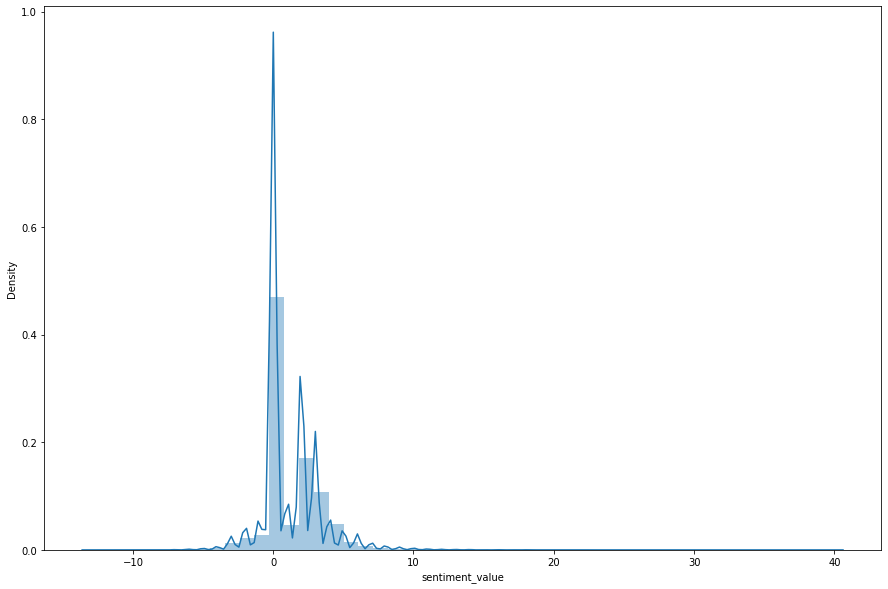

In [80]:
plt.figure(figsize=(15, 10))
sns.distplot(sent_df['sentiment_value'])

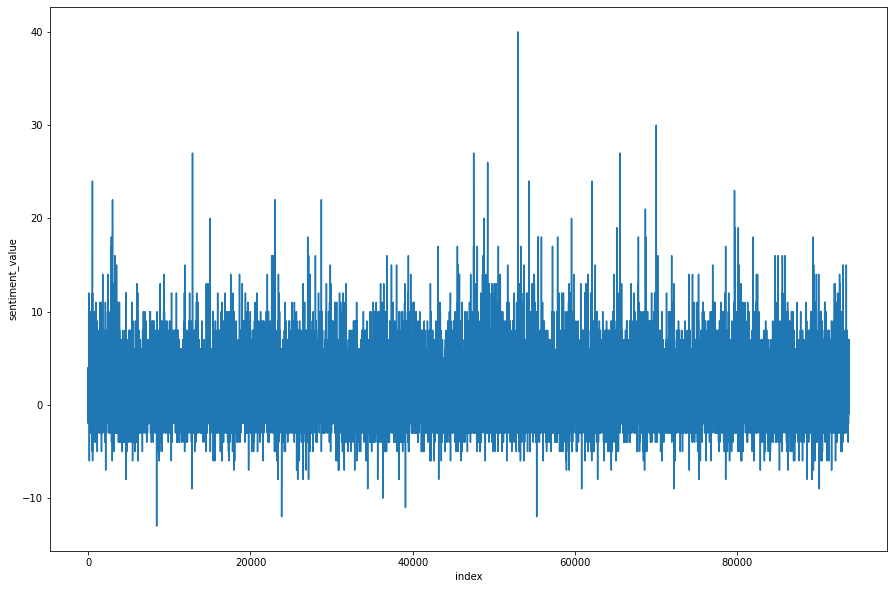

In [81]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

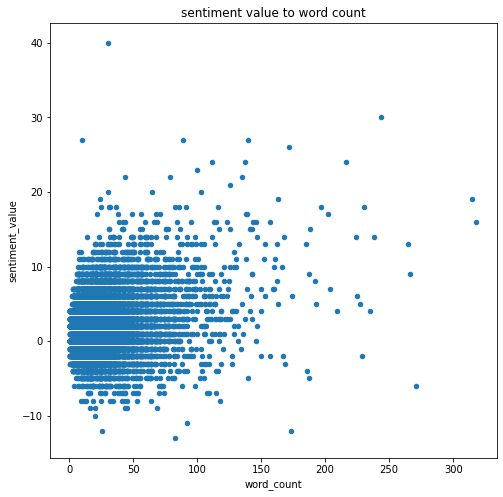

In [82]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='sentiment value to word count')